<a href="https://colab.research.google.com/github/Monisha5621/Data-Science-Portfolio/blob/main/MBA_Final_Project_Text_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pdfminer.six

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# **Divorce cases**


In [ ]:
import pdfminer

In [ ]:
import os
from pdfminer.high_level import extract_text

# Define the path to the folder containing the PDF files
pdf_folder ="/content/drive/MyDrive/Divorce Cases"

# Create an empty list to store the text content of each PDF file
pdf_texts = []

# Iterate through each PDF file in the folder
for filename in os.listdir(pdf_folder):
    if filename.endswith(".PDF"):
        # Extract the text content from the PDF file using PDFMiner
        pdf_text = extract_text(os.path.join(pdf_folder, filename))
        # Append the text content to the list of PDF texts
        pdf_texts.append(pdf_text)

In [ ]:
pdf_process_texts = pdf_texts

In [ ]:
!python -m spacy download en_core_web_lg

2023-04-25 05:11:22.344116: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 587.7/587.7 MB 1.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [ ]:
import spacy
from collections import Counter
from string import punctuation

nlp = spacy.load("en_core_web_lg")

import en_core_web_lg
nlp = en_core_web_lg.load()

def top_sentence(text, limit):

    keyword = []
    pos_tag = ['PROPN', 'ADJ', 'NOUN', 'VERB']
    doc = nlp(text.lower()) #1
    for token in doc: #2
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue #3
        if(token.pos_ in pos_tag):
            keyword.append(token.text) #4

    freq_word = Counter(keyword) #5
    max_freq = Counter(keyword).most_common(1)[0][1] #6
    for w in freq_word:
        freq_word[w] = (freq_word[w]/max_freq) #7
    sent_strength={}
    for sent in doc.sents: #8
        for word in sent: #9
            if word.text in freq_word.keys(): #10
                if sent in sent_strength.keys():
                    sent_strength[sent]+=freq_word[word.text]#11
                else:
                    sent_strength[sent]=freq_word[word.text]#12

    summary = []
    sorted_x = sorted(sent_strength.items(), key=lambda kv: kv[1], reverse=True) #13

    counter = 0
    for i in range(len(sorted_x)): #14
        summary.append(str(sorted_x[i][0]).capitalize()) #15
        counter += 1
        if(counter >= limit):
            break #16

    return ' '.join(summary) #17

# List of documents
documents = pdf_texts

# Initialize an empty list to store summaries
summaries = []

# Loop over each document and call the top_sentence function
for doc in documents:
    summary = top_sentence(doc, 2)
    summaries.append(summary)

# Print the list of summaries
print("List of summaries:")
print(summaries)


List of summaries:
["The family court, thodupuzha.\n\n                for petitioner  :smt.p.k.radhika\n\n                for respondent  : no appearance\n\nthe hon'ble mr. justice kurian joseph\nthe hon'ble mr. justice harun-ul-rashid\n\n dated :05/12/2008\n\n o r d e r\n             kurian joseph & harun-ul-rashid, jj.\n               ---------------------------------------------------------\n                          w.p.(c) no. 25191 of 2008\n                ---------------------------------------------------------\n                   dated this the 5th day of december, 2008\n\n                                   judgment\n\nharun-ul-rashid, j.\n\nthe first respondent herein filed o.p.(divorce) no.146 of 2007 before the family court,\nthodupuzha for a decree of divorce. Kerala high court\nsuni john vs jobi m. john on 5 december, 2008\n\nsuni john vs jobi m. john on 5 december, 2008\n\n  in the high court of kerala at ernakulam\n\nwp(c).no.", 'The terms of settlement between the part

In [ ]:
summaries

In [ ]:
cleaned_summary_list = summaries

In [ ]:
import nltk
import re
import string
from nltk.corpus import stopwords, brown
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer



In [ ]:
def preprocess_text(text):
    '''Cleans text data up, leaving only 2 or more char long non-stepwords composed of A-Z & a-z only
    in lowercase'''

    # Convert text to lowercase
    text = text.lower()


    # Remove RT
    text = re.sub('RT @\w+: '," ", text)

    # Remove special characters
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ", text)

    # Single character removal
    text = re.sub(r"\s+[a-zA-Z]\s+", ' ', text)

    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text)

    return text

In [ ]:
cleaned_list = []
for text in cleaned_summary_list:
    # apply preprocessing steps to text

    cleaned_text = preprocess_text(text)
    # add cleaned text to cleaned_list

    cleaned_list.append(cleaned_text)

In [ ]:
original_list = []
for text in pdf_process_texts:
    # apply preprocessing steps to text

    cleaned_text = preprocess_text(text)
    # add cleaned text to cleaned_list

    original_list.append(cleaned_text)

In [ ]:
cleaned_list

['the family court thodupuzha for petitioner smt k radhika for respondent no appearance the hon ble mr justice kurian joseph the hon ble mr justice harun ul rashid dated 05 12 2008 r e kurian joseph harun ul rashid jj p no 25191 of 2008 dated this the 5th day of december 2008 judgment harun ul rashid the first respondent herein filed p divorce no 146 of 2007 before the family court thodupuzha for decree of divorce kerala high court suni john vs jobi john on 5 december 2008 suni john vs jobi john on 5 december 2008 in the high court of kerala at ernakulam wp no ',
 'the terms of settlement between the parties as reflected in the mou are extracted below e o a d m f n e s a d n t e e o a d m f understanding is made and entered into at azamgarh on this 12 th day of december 2022 by and between mr rajeev satyaraj sabale son of satyaraj sabale aged 37 years residing at 3 rajyasarthi bhanu darshan near sambhaji park mulund east 400081 currently residing at room no 621 katradevi housing societ

In [ ]:
import nltk
nltk.download('punkt')  # Download punkt tokenizer (if not already downloaded)

from nltk.tokenize import sent_tokenize

# Example list of texts
text_list = cleaned_list

# Split text into sentences using nltk's sent_tokenize function
sentences_list = [sent_tokenize(text) for text in text_list]

# Flatten the nested list of sentences
sentences = [sentence for sublist in sentences_list for sentence in sublist]

# Print the resulting sentences
for sentence in sentences:
    print(sentence)


the family court thodupuzha for petitioner smt k radhika for respondent no appearance the hon ble mr justice kurian joseph the hon ble mr justice harun ul rashid dated 05 12 2008 r e kurian joseph harun ul rashid jj p no 25191 of 2008 dated this the 5th day of december 2008 judgment harun ul rashid the first respondent herein filed p divorce no 146 of 2007 before the family court thodupuzha for decree of divorce kerala high court suni john vs jobi john on 5 december 2008 suni john vs jobi john on 5 december 2008 in the high court of kerala at ernakulam wp no
the terms of settlement between the parties as reflected in the mou are extracted below e o a d m f n e s a d n t e e o a d m f understanding is made and entered into at azamgarh on this 12 th day of december 2022 by and between mr rajeev satyaraj sabale son of satyaraj sabale aged 37 years residing at 3 rajyasarthi bhanu darshan near sambhaji park mulund east 400081 currently residing at room no 621 katradevi housing society dr s 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

# Tokenize sentences into words
words_list = [word_tokenize(sentence) for sentence in sentences]

# Flatten the nested list of words
words = [word for sublist in words_list for word in sublist]

# Print the resulting words
for word in words:
    print(word)

In [ ]:
from collections import Counter

# Example list of words
words_freq = words
# Use Counter to count word occurrences
word_counts = Counter(words)

# Print word counts
for word, count in word_counts.items():
    print(f"{word}: {count} occurrences")

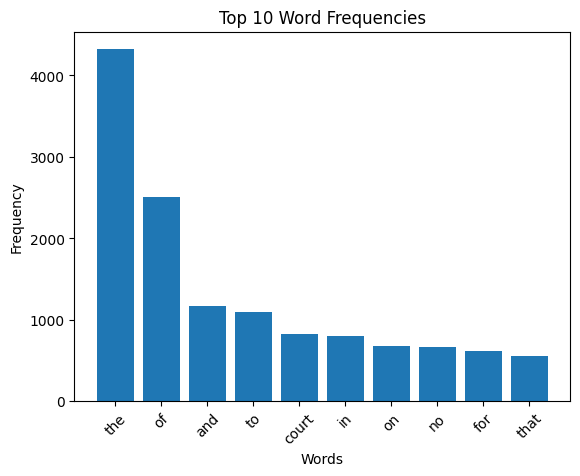

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Example list of words
words_freq_1 = words
# Use Counter to count the frequency of each word
word_counts = Counter(words_freq)

# Get the top 10 most common words and their frequencies
top_words = word_counts.most_common(10)
top_words_words = [word[0] for word in top_words]
top_words_counts = [word[1] for word in top_words]

# Create a bar graph of the top 10 word frequencies
plt.bar(top_words_words, top_words_counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Word Frequencies')
plt.xticks(rotation=45)
plt.show()


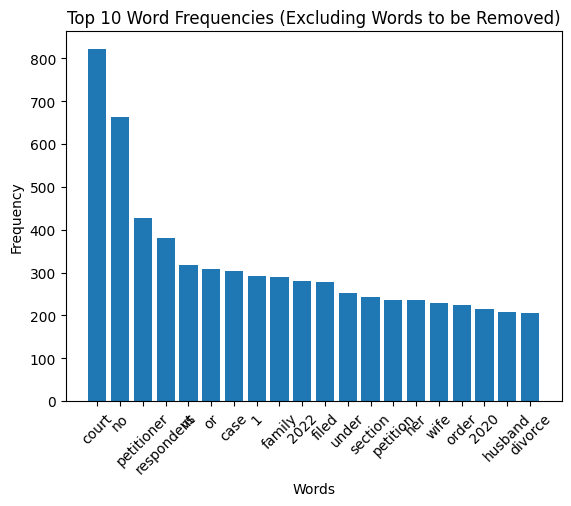

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

# Example list of words
words_freq_2 = words

# List of words to be removed
words_prep = ["the", "of", "to", "and", "in", "that", "is", "on", "for", 'with', 'mr', 'has', '2', 'as', 'by', 'this', 'be', 'was', '3', 'at', 'ner']

# Filter out words to be removed from the list of words
filtered_words = [word for word in words if word not in words_prep]

# Use Counter to count the frequency of each word
word_counts = Counter(filtered_words)

# Get the top 10 most common words and their frequencies
top_words = word_counts.most_common(20)
top_words_words = [word[0] for word in top_words]
top_words_counts = [word[1] for word in top_words]

# Create a bar graph of the top 10 word frequencies
plt.bar(top_words_words, top_words_counts)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Word Frequencies (Excluding Words to be Removed)')
plt.xticks(rotation=45)
plt.show()

In [ ]:
words_prep = ["the", "of", "to", "and", "in", "that", "is", "on", "for", 'with', 'mr', 'has', '2', 'as', 'by', 'this', 'be', 'was', '3', 'at', 'ner']

# Iterate over each summary in summary_list
cleaned_summary_list = []
for summary in cleaned_list:
    # Split summary into words
    words = summary.split()

    # Remove words in words_prep list
    cleaned_words = [word for word in words if word.lower() not in words_prep]

    # Join the cleaned words back to form the cleaned summary
    cleaned_summary = ' '.join(cleaned_words)

    # Add the cleaned summary to cleaned_summary_list
    cleaned_summary_list.append(cleaned_summary)

In [ ]:
cleaned_summary_list

['family court thodupuzha petitioner smt k radhika respondent no appearance hon ble justice kurian joseph hon ble justice harun ul rashid dated 05 12 2008 r e kurian joseph harun ul rashid jj p no 25191 2008 dated 5th day december 2008 judgment harun ul rashid first respondent herein filed p divorce no 146 2007 before family court thodupuzha decree divorce kerala high court suni john vs jobi john 5 december 2008 suni john vs jobi john 5 december 2008 high court kerala ernakulam wp no',
 'terms settlement between parties reflected mou are extracted below e o a d m f n e s a d n t e e o a d m f understanding made entered into azamgarh 12 th day december 2022 between rajeev satyaraj sabale son satyaraj sabale aged 37 years residing rajyasarthi bhanu darshan near sambhaji park mulund east 400081 currently residing room no 621 katradevi housing society dr s rao road next rajkamal studio parel east mumbai 400012 hereinafter referred first party which expression shall unless it repugnant cont

In [ ]:
words_prep = ["the", "of", "to", "and", "in", "that", "is", "on", "for", 'with', 'mr', 'has', '2', 'as', 'by', 'this', 'be', 'was', '3']

# Iterate over each summary in summary_list
cleaned_original_list = []
for summary in original_list:
    # Split summary into words
    words = summary.split()

    # Remove words in words_prep list
    cleaned_words = [word for word in words if word.lower() not in words_prep]

    # Join the cleaned words back to form the cleaned summary
    cleaned_summary = ' '.join(cleaned_words)

    # Add the cleaned summary to cleaned_summary_list
    cleaned_original_list.append(cleaned_summary)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer

# Sample documents and summaries
documents = cleaned_original_list
summaries = cleaned_summary_list
# Initialize CountVectorizer object
vectorizer = CountVectorizer()

# Fit and transform the documents and summaries
document_vectors = vectorizer.fit_transform(documents)
summary_vectors = vectorizer.transform(summaries)

# Compute cosine similarity between each document and its corresponding summary
cosine_similarities = cosine_similarity(document_vectors, summary_vectors)

# Print cosine similarity scores and mean similarity score
mean_similarity_score = 0
for i, score in enumerate(cosine_similarities.diagonal()):
    print("Cosine Similarity for Document {}: {:.2f}".format(i+1, score))
    mean_similarity_score += score
mean_similarity_score /= len(cosine_similarities.diagonal())
print("Mean Cosine Similarity: {:.2f}".format(mean_similarity_score))

Cosine Similarity for Document 1: 0.85
Cosine Similarity for Document 2: 0.69
Cosine Similarity for Document 3: 0.51
Cosine Similarity for Document 4: 0.70
Cosine Similarity for Document 5: 0.61
Cosine Similarity for Document 6: 0.79
Cosine Similarity for Document 7: 0.67
Cosine Similarity for Document 8: 0.88
Cosine Similarity for Document 9: 0.61
Cosine Similarity for Document 10: 0.36
Cosine Similarity for Document 11: 0.63
Cosine Similarity for Document 12: 0.88
Cosine Similarity for Document 13: 0.80
Cosine Similarity for Document 14: 0.62
Cosine Similarity for Document 15: 0.72
Cosine Similarity for Document 16: 0.68
Cosine Similarity for Document 17: 0.80
Cosine Similarity for Document 18: 0.53
Cosine Similarity for Document 19: 0.54
Cosine Similarity for Document 20: 0.84
Cosine Similarity for Document 21: 0.77
Cosine Similarity for Document 22: 0.76
Cosine Similarity for Document 23: 0.55
Cosine Similarity for Document 24: 0.56
Cosine Similarity for Document 25: 0.49
Cosine Si

In [ ]:
pip install bertopic

In [ ]:
#import packages

import pandas as pd
import numpy as np
from bertopic import BERTopic

In [ ]:
text = cleaned_summary_list

In [ ]:
original = cleaned_original_list

In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

# we add this to remove stopwords
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")

model = BERTopic(
    vectorizer_model=vectorizer_model,
    language='english', calculate_probabilities=True,
    verbose=True
)
topics, probs = model.fit_transform(original)


Batches:   0%|          | 0/8 [00:00<?, ?it/s]

2023-04-25 05:35:36,549 - BERTopic - Transformed documents to Embeddings
2023-04-25 05:35:48,154 - BERTopic - Reduced dimensionality
2023-04-25 05:35:48,193 - BERTopic - Clustered reduced embeddings


In [ ]:
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer

# we add this to remove stopwords
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")

model_sum = BERTopic(
    vectorizer_model=vectorizer_model,
    language='english', calculate_probabilities=True,
    verbose=True
)
topics, probs = model_sum.fit_transform(text)


Batches:   0%|          | 0/8 [00:00<?, ?it/s]

2023-04-25 05:36:36,839 - BERTopic - Transformed documents to Embeddings
2023-04-25 05:36:39,566 - BERTopic - Reduced dimensionality
2023-04-25 05:36:39,592 - BERTopic - Clustered reduced embeddings


In [ ]:
freq = model.get_topic_info()
freq.head(10)

,Topic,Count,Name
0,-1,30,-1_petitioner_court_respondent_2022
1,0,136,0_court_cid_respondent_husband
2,1,32,1_court_petitioner_patna_2020
3,2,31,2_2022_court_tr_transfer
4,3,22,3_court_transfer_2020_petitioner


In [ ]:
freq = model_sum.get_topic_info()
freq.head(10)

,Topic,Count,Name
0,-1,117,-1_court_petitioner_cid_cid 128
1,0,49,0_court_transfer_2022_file
2,1,28,1_appellant_respondent_wife_marriage
3,2,23,2_vs_singh_haryana_state
4,3,19,3_state_patna_vs state_2020
5,4,15,4_order_divorce_period_date


In [ ]:
model.visualize_topics()

In [ ]:
model_sum.visualize_topics()

In [ ]:
model.visualize_barchart()

In [ ]:
model_sum.visualize_barchart()

In [ ]:
model.visualize_heatmap()

In [ ]:
model_sum.visualize_heatmap()